In [11]:
import random
import numpy as np
import pandas as pd
import numpy_financial as npf


# Step 1: Create a table to store loan data
loan_table = pd.DataFrame(columns=['loan_amount', 'interest_rate', 'term_months', 'monthly_payment', 'loan_purpose', 
                                   'borrower_info','collateral_value','borrower_income', 'loan_status'])
#set a seed
random.seed(123)
# Step 2: Generate random loan amounts
loan_amounts = np.random.randint(1000, 50001, size=500)

# Step 3: Calculate interest rates
interest_rates = np.round(np.random.uniform(0.04, 0.27, size=500), 4)

# Step 4: Calculate loan terms
loan_terms = np.random.randint(36, 61, size=500)

# Step 5: Generate borrower_info 
first_names = ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'Grace', 'Henry', 'Isabella', 'Jack', 'Kate', 
               'Liam', 'Mia', 'Nora', 'Oliver', 'Penelope', 'Quinn', 'Ryan', 'Sophia', 'Thomas', 'Uma', 'Violet', 'William', 'Xavier', 'Yara', 'Zachary']
last_names = ['Anderson', 'Baker', 'Clark', 'Davis', 'Edwards', 'Franklin', 'Garcia', 'Harris', 'Ingram', 'Johnson', 
              'Kumar', 'Lee', 'Miller', 'Nguyen', 'Olsen', 'Patel', 'Qureshi', 'Ramirez', 'Singh', 'Thompson', 'Upton', 'Valdez', 'Williams', 'Xu', 'Yang',
                'Zhang']

        # Generate 500 unique names for the borrower_info column
borrower_info = []
while len(borrower_info) < 500:
    # Generate a random first name and last name
    first_name = random.choice(first_names)
    last_name = random.choice(last_names)
    name = f'{first_name} {last_name}'
    
    # If the name is not already in the list, add it
    if name not in borrower_info:
        borrower_info.append(name)


# Step 6: Calculate monthly payments
monthly_payments = []
for i in range(500):
    rate = interest_rates[i] / 12
    nper = loan_terms[i]
    pv = -loan_amounts[i]
    monthly_payment = np.round(npf.pmt(rate, nper, pv, fv=0, when='end'), 2)
    monthly_payments.append(monthly_payment)

# Step 7: Add other relevant data
loan_purposes = ['car loan', 'house', 'debt consolidation', 'small business', 'student loan', 'personal loan']
#borrower_info = ['John Smith', 'Sara Lee', 'Bob Johnson', 'Mike Brown', 'Amy Chen', 'Joe Smith']
loan_status = ['approved', 'rejected', 'pending', 'approved', 'approved', 'rejected']
collateral_values = np.random.randint(10000, 70000, size=500)
borrower_incomes = np.random.randint(5000, 100001, size=500)


loan_table['loan_amount'] = loan_amounts
loan_table['interest_rate'] = interest_rates
loan_table['term_months'] = loan_terms
loan_table['monthly_payment'] = monthly_payments
loan_table['loan_purpose'] = np.random.choice(loan_purposes, size=500)
loan_table['collateral_value'] = collateral_values
loan_table['borrower_income'] = borrower_incomes
loan_table['borrower_info'] = borrower_info
loan_table['loan_status'] = np.random.choice(loan_status, size=500)

# Step 8: Repeat for multiple loans
# We have already generated 100 loans in this case

# Print the loan table
loan_table.head()


# In this example, we use the 'numpy_financial' library to generate the random loan amounts, interest rates, and loan terms. 
# We use the npf.pmt() function to calculate the monthly payments for each loan. Finally, 
# we use the Pandas library to create a DataFrame to store the loan data and add other relevant data to the table.

,loan_amount,interest_rate,term_months,monthly_payment,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status
0,26967,0.1019,60,575.49,student loan,Bob Ingram,40452,7725,approved
1,42745,0.2239,55,1249.62,debt consolidation,Charlie Yang,43182,86746,rejected
2,5684,0.0566,41,152.80,student loan,Nora Ingram,66637,16658,approved
3,44834,0.1718,51,1244.76,car loan,David Baker,46012,97705,approved
4,26632,0.2479,50,859.29,small business,Mia Ramirez,14308,77269,approved


In [12]:
# The loan table has already been generated and is stored in the variable 'loan_table'

# Write loan table to CSV file
loan_table.to_csv('loan_data_sim.csv', index=False)

In [26]:
sim_loan_table = pd.read_csv('/Users/lakeside/loan_data_sim.csv')
sim_loan_table.head()
sim_loan_table.shape

(500, 9)

In [27]:
#sim_loan_table['pmt_expected_by_term'] = sim_loan_table.apply(lambda x: x['term_months'] * x['monthly_payment'], axis=1)

sim_loan_table.insert(4, 'pmt_expected_by_term', sim_loan_table['term_months'] * sim_loan_table['monthly_payment'])
sim_loan_table.head()
sim_loan_table.shape


(500, 10)

In [29]:
#Expected profit calculated by lender
total_loan_amount = sim_loan_table['loan_amount'].sum()
total_monthly_payment = sim_loan_table['pmt_expected_by_term'].sum()
interest_rate_avg = sim_loan_table['interest_rate'].mean()

print('Total loan amount:', total_loan_amount)
print('Total monthly payment:', total_monthly_payment)
print('Average Interest rate:', interest_rate_avg)

Total loan amount: 12129410
Total monthly payment: 16454974.86
Average Interest rate: 0.15626179999999984


In [45]:
#Loan approved aggregation
Loan_approved = sim_loan_table.loc[(sim_loan_table['loan_status'] == 'approved')]

Loan_approved.head(10)

,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P)
0,26967,0.1019,60,575.49,34529.40,student loan,Bob Ingram,40452,7725,approved,349.09,high,defaulted
2,5684,0.0566,41,152.80,6264.80,student loan,Nora Ingram,66637,16658,approved,34.12,low,fulfilled
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted
4,26632,0.2479,50,859.29,42964.50,small business,Mia Ramirez,14308,77269,approved,34.47,low,fulfilled
8,17759,0.2277,47,574.41,26997.27,small business,Kate Ramirez,60426,49597,approved,35.81,low,fulfilled
9,11954,0.2628,47,409.85,19262.95,small business,Kate Williams,12942,50472,approved,23.68,low,fulfilled
10,2991,0.1379,53,75.67,4010.51,car loan,Henry Franklin,35752,69699,approved,4.29,low,fulfilled
11,4752,0.1878,55,129.49,7121.95,personal loan,Alice Nguyen,32549,96893,approved,4.90,low,fulfilled
13,7911,0.1059,59,172.59,10182.81,personal loan,Thomas Miller,62030,7635,approved,103.61,high,defaulted
14,18401,0.0731,42,497.88,20910.96,house,Charlie Anderson,24968,21521,approved,85.50,high,defaulted


In [46]:
#For Approved Loan: Expected profit calculated by lender
total_loan_amount = Loan_approved['loan_amount'].sum()
total_monthly_payment = Loan_approved['pmt_expected_by_term'].sum()
interest_rate_avg = Loan_approved['interest_rate'].mean()

print('Total loan amount:', total_loan_amount)
print('Total monthly payment:', total_monthly_payment)
print('Average Interest rate:', interest_rate_avg)

Total loan amount: 5766608
Total monthly payment: 7883695.01
Average Interest rate: 0.1601525


In [32]:
sim_loan_table['loan_purpose'].value_counts()

small business        90
student loan          89
personal loan         86
house                 81
car loan              78
debt consolidation    76
Name: loan_purpose, dtype: int64

[Text(0, 0, 'small\nbusiness'),
 Text(1, 0, 'student loan'),
 Text(2, 0, 'personal\nloan'),
 Text(3, 0, 'house'),
 Text(4, 0, 'car loan'),
 Text(5, 0, 'debt consoli\ndation')]

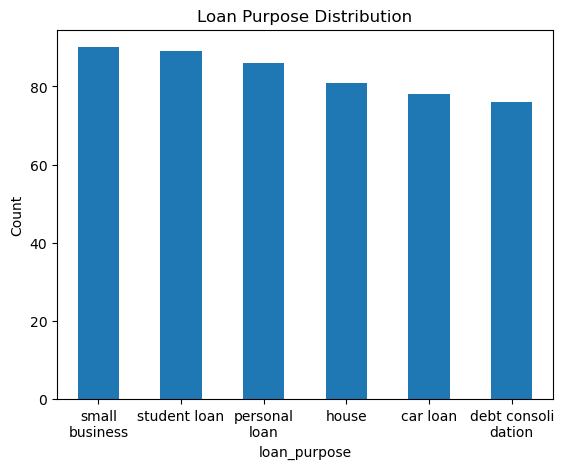

In [34]:
import textwrap

lp = sim_loan_table['loan_purpose'].value_counts().plot(kind='bar', xlabel='loan_purpose', ylabel='Count', rot=0)
plt.title("Loan Purpose Distribution")

labels = [textwrap.fill(label.get_text(), 12) for label in lp.get_xticklabels()]
lp.set_xticklabels(labels)

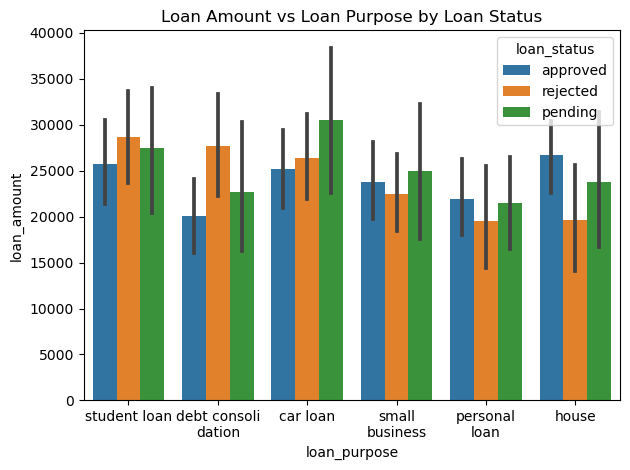

In [38]:
from seaborn import pairplot
import seaborn as sns
f, axs = plt.subplots(1, 1)
c = sns.barplot(data=sim_loan_table.query("loan_purpose != 'NaN'")
                             , x="loan_purpose", y="loan_amount", hue = "loan_status")
plt.title("Loan Amount vs Loan Purpose by Loan Status")
labels = [textwrap.fill(label.get_text(), 12) for label in c.get_xticklabels()]
c.set_xticklabels(labels)

f.tight_layout()


plt.show()

In [39]:
#Calculate Debt-to-Income to check the percentage of loan liable for risk
sim_loan_table['DTI'] = round((sim_loan_table['loan_amount'] / sim_loan_table['borrower_income']) * 100, 2)

#Specified the Debt-to-Income target threshold 
sim_loan_table['DTI_target(<=45%)'] = sim_loan_table['DTI'].apply(lambda x: 'low' if x <= 45 else 'high')

#Specified the Debt-to-Income target threshold 
sim_loan_table['Promised-to-Pay(P2P)'] = sim_loan_table['DTI_target(<=45%)'].apply(lambda x: 'fulfilled' if x == 'low' else 'defaulted')

sim_loan_table.head()


,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P)
0,26967,0.1019,60,575.49,34529.40,student loan,Bob Ingram,40452,7725,approved,349.09,high,defaulted
1,42745,0.2239,55,1249.62,68729.10,debt consolidation,Charlie Yang,43182,86746,rejected,49.28,high,defaulted
2,5684,0.0566,41,152.80,6264.80,student loan,Nora Ingram,66637,16658,approved,34.12,low,fulfilled
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted
4,26632,0.2479,50,859.29,42964.50,small business,Mia Ramirez,14308,77269,approved,34.47,low,fulfilled


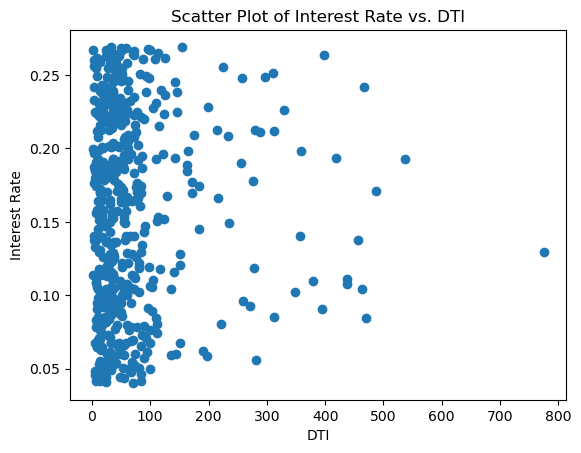

In [40]:
# plt.scatter(x=sim_loan_table['DTI'], y=sim_loan_table['interest_rate'])
# plt.title('Scatter Plot of Interest Rate vs. DTI')
# plt.xlabel('DTI')
# plt.ylabel('Interest Rate')
# plt.show()

In [41]:
# create a cross-tabulation table of loan_status and P2P
cross_tab = pd.crosstab(sim_loan_table['loan_status'], sim_loan_table['Promised-to-Pay(P2P)'])

#print(cross_tab)
cross_tab

Promised-to-Pay(P2P),defaulted,fulfilled
loan_status,,
approved,122,118
pending,52,49
rejected,70,89


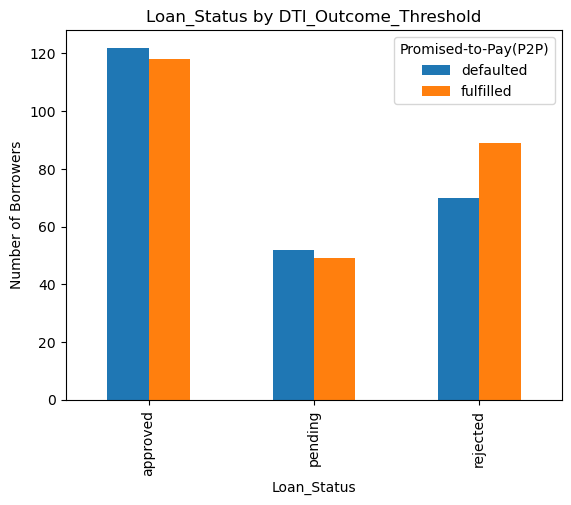

In [42]:
import matplotlib.pyplot as plt

# plot the table as a stacked bar plot
cross_tab.plot(kind='bar', stacked=False)

# set the plot title and axes labels
plt.title('Loan_Status by DTI_Outcome_Threshold')
plt.xlabel('Loan_Status')
plt.ylabel('Number of Borrowers')

# show the plot
plt.show()

In [43]:
##List of 122 borrower info that are risky to the lender
Loan_approved_defaulted = sim_loan_table.loc[(sim_loan_table['loan_status'] == 'approved') & (sim_loan_table['Promised-to-Pay(P2P)'] == 'defaulted')]

Loan_approved_defaulted.head(10)



,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P)
0,26967,0.1019,60,575.49,34529.40,student loan,Bob Ingram,40452,7725,approved,349.09,high,defaulted
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted
13,7911,0.1059,59,172.59,10182.81,personal loan,Thomas Miller,62030,7635,approved,103.61,high,defaulted
14,18401,0.0731,42,497.88,20910.96,house,Charlie Anderson,24968,21521,approved,85.50,high,defaulted
17,35771,0.2080,55,1014.14,55777.70,debt consolidation,Bob Clark,57873,49487,approved,72.28,high,defaulted
19,29278,0.2282,46,960.61,44188.06,small business,Emily Zhang,27500,14672,approved,199.55,high,defaulted
20,46074,0.2026,37,1684.57,62329.09,debt consolidation,Alice Johnson,25087,80603,approved,57.16,high,defaulted
27,31213,0.2290,41,1104.45,45282.45,debt consolidation,Grace Thompson,18154,55734,approved,56.00,high,defaulted
28,40080,0.1865,59,1042.64,61515.76,house,Uma Qureshi,53072,46886,approved,85.48,high,defaulted
44,32685,0.1433,45,943.11,42439.95,house,Mia Clark,47338,36625,approved,89.24,high,defaulted


In [53]:
# generate random credit scores between 300 and 850
credit_scores = np.random.randint(300, 851, size=len(Loan_approved_defaulted))

# add credit score column to loan_data_filtered
Loan_approved_defaulted['credit_score'] = credit_scores

Loan_approved_defaulted.head(10)

/var/folders/ll/d4b0bzy52d74nq4s5l407yb40000gn/T/ipykernel_58282/3595285506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_approved_defaulted['credit_score'] = credit_scores


,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P),credit_score
0,26967,0.1019,60,575.49,34529.40,student loan,Bob Ingram,40452,7725,approved,349.09,high,defaulted,610
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted,763
13,7911,0.1059,59,172.59,10182.81,personal loan,Thomas Miller,62030,7635,approved,103.61,high,defaulted,549
14,18401,0.0731,42,497.88,20910.96,house,Charlie Anderson,24968,21521,approved,85.50,high,defaulted,804
17,35771,0.2080,55,1014.14,55777.70,debt consolidation,Bob Clark,57873,49487,approved,72.28,high,defaulted,742
19,29278,0.2282,46,960.61,44188.06,small business,Emily Zhang,27500,14672,approved,199.55,high,defaulted,545
20,46074,0.2026,37,1684.57,62329.09,debt consolidation,Alice Johnson,25087,80603,approved,57.16,high,defaulted,390
27,31213,0.2290,41,1104.45,45282.45,debt consolidation,Grace Thompson,18154,55734,approved,56.00,high,defaulted,469
28,40080,0.1865,59,1042.64,61515.76,house,Uma Qureshi,53072,46886,approved,85.48,high,defaulted,354
44,32685,0.1433,45,943.11,42439.95,house,Mia Clark,47338,36625,approved,89.24,high,defaulted,384


In [44]:
#Dealing with risky loan approved to borrowers to check for what profit reduced to or amount of loss that would accrued 
total_loan_amount = Loan_approved_defaulted['loan_amount'].sum()
total_monthly_payment_defaulted = Loan_approved_defaulted['pmt_expected_by_term'].sum()
interest_rate_avg = Loan_approved_defaulted['interest_rate'].mean()

print('Total loan amount:', total_loan_amount)
print('Total monthly payment:', total_monthly_payment_defaulted)
print('Average Interest rate:', interest_rate_avg)

Total loan amount: 3984818
Total monthly payment: 5476354.05
Average Interest rate: 0.16262786885245908


In [50]:
asset_value = Loan_approved_defaulted.loc[Loan_approved_defaulted['loan_purpose'].isin(['house', 'car loan'])]

asset_value.head(10)

,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P)
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted
14,18401,0.0731,42,497.88,20910.96,house,Charlie Anderson,24968,21521,approved,85.50,high,defaulted
28,40080,0.1865,59,1042.64,61515.76,house,Uma Qureshi,53072,46886,approved,85.48,high,defaulted
44,32685,0.1433,45,943.11,42439.95,house,Mia Clark,47338,36625,approved,89.24,high,defaulted
48,37430,0.2364,37,1434.21,53065.77,house,Alice Garcia,67532,29665,approved,126.18,high,defaulted
73,46918,0.1290,40,1449.35,57974.00,car loan,William Clark,12672,78028,approved,60.13,high,defaulted
78,41091,0.1925,58,1093.71,63435.18,house,William Upton,36599,7647,approved,537.35,high,defaulted
89,41458,0.1129,44,1155.03,50821.32,car loan,Bob Yang,40363,57352,approved,72.29,high,defaulted
112,25326,0.2263,44,852.16,37495.04,house,Xavier Lee,62204,41937,approved,60.39,high,defaulted
127,48107,0.0507,56,966.49,54123.44,house,Alice Ingram,25394,89053,approved,54.02,high,defaulted


In [51]:
asset_value['LTV'] = round((asset_value['loan_amount'] / asset_value['collateral_value'])* 100, 2)

asset_value.head()

#calculate the loan-to-value (LTV) ratio, we need to divide the loan amount by 
#the appraised value of the asset that the loan is being used to finance.

/var/folders/ll/d4b0bzy52d74nq4s5l407yb40000gn/T/ipykernel_58282/1746265562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_value['LTV'] = round((asset_value['loan_amount'] / asset_value['collateral_value'])* 100, 2)


,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P),LTV
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted,97.44
14,18401,0.0731,42,497.88,20910.96,house,Charlie Anderson,24968,21521,approved,85.50,high,defaulted,73.70
28,40080,0.1865,59,1042.64,61515.76,house,Uma Qureshi,53072,46886,approved,85.48,high,defaulted,75.52
44,32685,0.1433,45,943.11,42439.95,house,Mia Clark,47338,36625,approved,89.24,high,defaulted,69.05
48,37430,0.2364,37,1434.21,53065.77,house,Alice Garcia,67532,29665,approved,126.18,high,defaulted,55.43


In [54]:
# Another way to calculate risk-based pricing (RBP) is by adding a risk premium to a base interest rate. 
# The base interest rate is determined by market conditions, and the risk premium is added based on the 
# borrower's credit risk. Here is an example code that demonstrates how to add a new column RBP to the 
# loan_data_with_DTI_and_thresh dataframe that represents the risk-based pricing using base 
# interest rate and risk premium:

# Define a function to calculate RBP based on the borrower's credit score
def calculate_RBP(base_rate, risk_premium):
    return base_rate + risk_premium

# Define the base interest rate and the risk premium for each credit score range
base_rate = 16.0
risk_premiums = {
    'excellent': -2.0,
    'good': 0.5,
    'fair': 1.5,
    'poor': 3.0
}

# Apply the function to the credit_score column and assign the result to a new column RBP
Loan_approved_defaulted['credit_score_range'] = pd.cut(Loan_approved_defaulted['credit_score'], bins=[0, 600, 650, 700, np.inf], labels=['poor', 'fair', 'good', 'excellent'])
Loan_approved_defaulted['risk_premium'] = Loan_approved_defaulted['credit_score_range'].map(risk_premiums)
Loan_approved_defaulted['RBP'] = Loan_approved_defaulted.apply(lambda x: calculate_RBP(base_rate, x['risk_premium']), axis=1)



/var/folders/ll/d4b0bzy52d74nq4s5l407yb40000gn/T/ipykernel_58282/4189106001.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_approved_defaulted['credit_score_range'] = pd.cut(Loan_approved_defaulted['credit_score'], bins=[0, 600, 650, 700, np.inf], labels=['poor', 'fair', 'good', 'excellent'])
/var/folders/ll/d4b0bzy52d74nq4s5l407yb40000gn/T/ipykernel_58282/4189106001.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_approved_defaulted['risk_premium'] = Loan_approved_defaulted['credit_score

In [55]:
Loan_approved_defaulted.head(10)

,loan_amount,interest_rate,term_months,monthly_payment,pmt_expected_by_term,loan_purpose,borrower_info,collateral_value,borrower_income,loan_status,DTI,DTI_target(<=45%),Promised-to-Pay(P2P),credit_score,credit_score_range,risk_premium,RBP
0,26967,0.1019,60,575.49,34529.40,student loan,Bob Ingram,40452,7725,approved,349.09,high,defaulted,610,fair,1.5,17.5
3,44834,0.1718,51,1244.76,63482.76,car loan,David Baker,46012,97705,approved,45.89,high,defaulted,763,excellent,-2.0,14.0
13,7911,0.1059,59,172.59,10182.81,personal loan,Thomas Miller,62030,7635,approved,103.61,high,defaulted,549,poor,3.0,19.0
14,18401,0.0731,42,497.88,20910.96,house,Charlie Anderson,24968,21521,approved,85.50,high,defaulted,804,excellent,-2.0,14.0
17,35771,0.2080,55,1014.14,55777.70,debt consolidation,Bob Clark,57873,49487,approved,72.28,high,defaulted,742,excellent,-2.0,14.0
19,29278,0.2282,46,960.61,44188.06,small business,Emily Zhang,27500,14672,approved,199.55,high,defaulted,545,poor,3.0,19.0
20,46074,0.2026,37,1684.57,62329.09,debt consolidation,Alice Johnson,25087,80603,approved,57.16,high,defaulted,390,poor,3.0,19.0
27,31213,0.2290,41,1104.45,45282.45,debt consolidation,Grace Thompson,18154,55734,approved,56.00,high,defaulted,469,poor,3.0,19.0
28,40080,0.1865,59,1042.64,61515.76,house,Uma Qureshi,53072,46886,approved,85.48,high,defaulted,354,poor,3.0,19.0
44,32685,0.1433,45,943.11,42439.95,house,Mia Clark,47338,36625,approved,89.24,high,defaulted,384,poor,3.0,19.0
